In [1]:
from PIL import Image
import os.path, sys
from skimage.io import imread, imshow
import cv2
from skimage import data, color, feature , exposure
import imgaug.augmenters as iaa
import numpy as np
import pandas as pd
from skimage.transform import resize
from skimage.feature import hog
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import seaborn as sns; sns.set()
import glob
import os

from _helper_functions import resize_aspect_fit

# --------------------------------Train Data-----------------------------------------

In [2]:
path = '/Users/toothless/Downloads/Thesis/data/Train/original/_nocancer/'

nocan_re = resize_aspect_fit(path,150)

nocan_re.shape

(6778, 150, 150, 3)

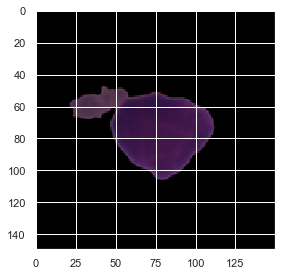

In [3]:
imshow(nocan_re[0])

In [ ]:
ncan_train , ncan_test = nocan_re[:]

In [ ]:
path1 = '/Users/toothless/Downloads/Thesis/data/Train/original/cancer/'
can_re = resize_aspect_fit(path1,150)
can_re.shape

In [ ]:
print(nocan_re.shape)
print(can_re.shape)

In [ ]:
can_labels = np.ones(can_re.shape[0])
nocan_labels = np.zeros(nocan_re.shape[0])


#Cancatenate Features and labels
features = np.concatenate((can_re,nocan_re),axis = 0)
labels = np.concatenate((can_labels,nocan_labels) , axis = 0)

#reshape features array
features = np.reshape(features,(features.shape[0],150*150*3))

# save labels and features to dataframe and shuffle data
train_df = pd.DataFrame(features)
train_df['labels'] = labels

train_df  = train_df.sample(frac=1).reset_index(drop=True)

In [ ]:
# Convert Features to Array and Save it
labels = train_df.pop('labels')
features = train_df.values

features = np.reshape(features,(features.shape[0],150,150,3))

In [ ]:
features = features /255

In [ ]:
imshow(features[10])

In [ ]:
# Save test Features
np.savez_compressed('/Users/toothless/Downloads/Thesis/data/feat/Train_RAW_150',features=features, labels=labels)

# --------------------------------TEST DATA------------------------------------------

In [ ]:
path1 = '/Users/toothless/Downloads/Thesis/data/Test/cancer/'
test_can_re = resize_aspect_fit(path1,150)
test_can_re.shape

In [ ]:
path = '/Users/toothless/Downloads/Thesis/data/Test/_nocancer/'
test_nocan_re = resize_aspect_fit(path,150)
test_nocan_re.shape

In [ ]:
testcan_labels = np.ones(test_can_re.shape[0])
testnocan_labels = np.zeros(test_nocan_re.shape[0])


#Cancatenate Features and labels
features = np.concatenate((test_can_re,test_nocan_re),axis = 0)
labels = np.concatenate((testcan_labels,testnocan_labels) , axis = 0)

#reshape features array
features = np.reshape(features,(features.shape[0],150*150*3))

# save labels and features to dataframe and shuffle data
test_df = pd.DataFrame(features)
test_df['labels'] = labels

test_df  = test_df.sample(frac=1).reset_index(drop=True)

In [ ]:
# Convert Features to Array and Save it
labels = test_df.pop('labels')
features = test_df.values

#reshape before saving
features = np.reshape(features,(features.shape[0],150,150,3))

In [ ]:
features = features /255

In [ ]:
imshow(features[100])

In [ ]:
# Save test Features
np.savez_compressed('/Users/toothless/Downloads/Thesis/data/feat/Test_RAW_150',features=features, labels=labels)